In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# procedure:
* make dats sets
* make model
* evaluate model
* create submission

# IMPORTS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from fastai.vision.all import *
import torch
import os
import ast
import cv2
import tqdm
from sklearn.model_selection import train_test_split as tts 
from torchvision import transforms, utils
import gc


In [3]:
gc.collect()

0

# visualizing some data

In [4]:
class CSV:
    base="../input/quickdraw-doodle-recognition/train_simplified"
    total=len(os.listdir(base))
    rows=510
    def __init__(self,index):
        base=self.base
        self.loc = base+"/"+os.listdir(base)[index]
        self.name = os.listdir(base)[index][:-4]
        self.csv = pd.read_csv(self.loc).iloc[:self.rows]
        
    def __len__(self):
        return self.csv.shape[0]
    
    def loc(self):
        return self.loc
    
    def name(self):
        return self.name
    
    def csv(self):
        return self.csv

In [5]:
index=11

a=CSV(index)

len(a),
#a.total

a.name

#a.loc
#a.name
#a.csv

vis=a.csv

In [6]:
X,y=vis["drawing"].values,vis["word"].values
#X=X[0].split(']]')
del vis,a,index
gc.collect()

42



## IMAGE square ##




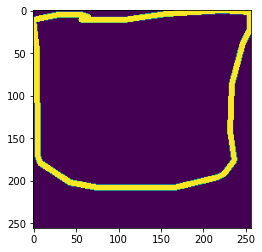



## IMAGE square ##




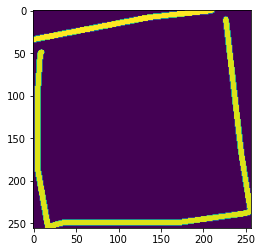



## IMAGE square ##




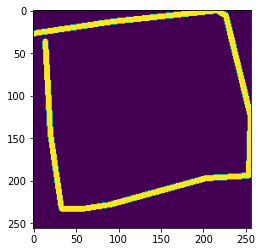



## IMAGE square ##




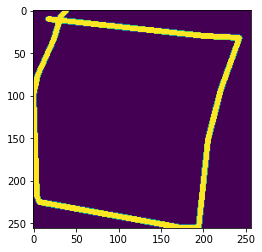



## IMAGE square ##




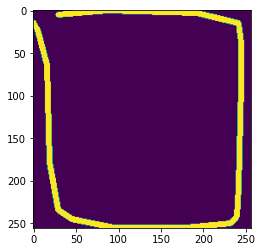

In [7]:
for i in range(5):
    print("\n\n## IMAGE {} ##\n\n".format(y[i]))
    new = ast.literal_eval(X[i])
    img= np.zeros((256,256), np.uint8)
    for t, stroke in enumerate(new):
        for i in range(len(stroke[0]) - 1):
            color = 255 - min(t,10) * 13 if True else 255
            _ = cv2.line(img, (stroke[0][i], stroke[1][i]), (stroke[0][i+1], stroke[1][i+1]), color, 6)
    plt.imshow(img)
    plt.show()

Images are overall similar to eachother yet contrastly different in meaning,
for example traffic lights are rectangular in shape and are related to rectangles but are labelled as traffic lights

# Utility function

In [8]:
def get_ims(X):
    ims=[]
    
    for i in range(len(X)):
        new = ast.literal_eval(X[i])
        img= np.zeros((256,256), np.uint8)
        
        for t, stroke in enumerate(new):
            for i in range(len(stroke[0]) - 1):
                color = 255 - min(t,10) * 13 if False else 255
                _ = cv2.line(img, (stroke[0][i], stroke[1][i]), (stroke[0][i+1], stroke[1][i+1]), color, 6)
        ims.append(img)
        del _,color,i,t,stroke,img
        gc.collect()
    return ims#return imges 

# training data{"image":list,"label":label}

In [9]:
def data(df,index):
    a=CSV(index)
    lenn=len(a)
    label=a.name
    a=a.csv["drawing"]
    a=get_ims(a)
    
    a=pd.DataFrame({"image":a,"label":[label for i in range(lenn)]})
    df = pd.concat([df , a], axis=0,ignore_index=True)
    return df

In [10]:
df=pd.DataFrame({"image":[],"label":[]})
for i,j in enumerate(tqdm.tqdm(range(340))):
    df=data(df,j)


100%|██████████| 340/340 [5:04:07<00:00, 53.67s/it]


In [11]:
#df.head()

In [12]:
X_train, X_test, y_train, y_test = tts(df["image"], df["label"], test_size=0.1, random_state=42)

In [13]:
del df,i,j
gc.collect()

63

In [14]:
dataset_sizes = {"train":len(X_train),"valid":len(y_train)}

In [15]:
dftrain=pd.DataFrame({"image":X_train,"label":y_train})
dftest=pd.DataFrame({"image":X_test,"label":y_test})

In [16]:
#dftrain.head()

In [17]:
#dftest.head()

In [18]:
del X_train, X_test, y_train, y_test 
gc.collect()

105

In [19]:
dftrain.image.iloc[0].shape

(256, 256)

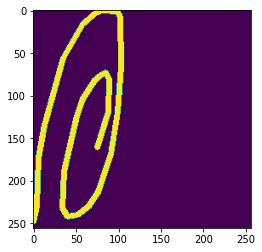

In [20]:
plt.imshow(dftrain.image.iloc[0])

In [21]:
unique=dftrain.label.unique()
unique1=unique
unique=enumerate(unique)
legend={}
for i, j in unique:
    legend[j]=i
del unique
gc.collect()

21

In [22]:
class trainingdf(torch.utils.data.Dataset):
    def __init__(self,df):
        self.DF=df
        self.class2index=legend
    def __len__(self):
        return self.DF.shape[0]
    def __getitem__(self,index):
        image=self.DF.image.iloc[index]
        image=np.array([image])
        label=self.DF.label.iloc[index]
        label=self.class2index[label]
        return image, label

In [23]:
dftrain=trainingdf(dftrain)
dftest=trainingdf(dftest)

In [24]:
gc.collect()

63

# training model

In [25]:

from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import copy


In [26]:
dls_tr=DataLoader(dftrain,batch_size=128*2,shuffle=True,num_workers=0)

In [27]:
dls_te=DataLoader(dftest,batch_size=128*2,shuffle=True,num_workers=0)

In [28]:
del dftest,dftrain
gc.collect()

84

In [29]:
gc.collect()

21

In [30]:
dls_te.batch_size

256

In [31]:
for i,j in dls_tr:
    break

In [32]:
i.shape

torch.Size([256, 1, 256, 256])

tensor(229)


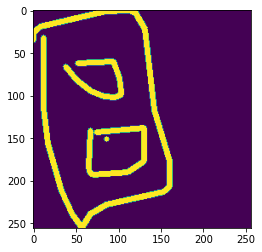

In [33]:
plt.imshow(i[0][0])
print(j[0])

In [34]:
del i,j
gc.collect()

2971

In [35]:
model = torchvision.models.resnet18(pretrained=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [36]:
device

device(type='cuda')

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002, amsgrad = True)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5000, 12000, 18000], gamma=0.5)

In [38]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 340)
model = model.to(device)

In [39]:
dataloaders={"train":dls_tr,"valid":dls_te}

In [40]:
del dls_tr,dls_te
gc.collect()

141

In [41]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            #global inputs
            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    
                    outputs = model(inputs/255)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')
    del best_acc,epoch_loss,epoch_acc
    gc.collect()
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [42]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['valid']):
            
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs/255)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                
                ax.set_title(f'predicted: {decode_labels(j)}')
                plt.imshow(inputs.cpu().data[j][0])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [43]:
def squeeze_weights(m):
    m.weight.data = m.weight.data.sum(dim=1)[:,None]
    m.in_channels = 1

model.conv1.apply(squeeze_weights)

Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [44]:
#inputs/255

In [45]:
model_ft = train_model(model, criterion, optimizer, scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 2.7109 Acc: 0.4698
valid Loss: 0.2165 Acc: 0.0640

Epoch 1/24
----------
train Loss: 1.5920 Acc: 0.6444
valid Loss: 0.1751 Acc: 0.0708

Epoch 2/24
----------
train Loss: 1.2790 Acc: 0.7024
valid Loss: 0.1599 Acc: 0.0730

Epoch 3/24
----------
train Loss: 1.0756 Acc: 0.7423
valid Loss: 0.1517 Acc: 0.0755

Epoch 4/24
----------
train Loss: 0.8891 Acc: 0.7832
valid Loss: 0.1540 Acc: 0.0746

Epoch 5/24
----------
train Loss: 0.7168 Acc: 0.8237
valid Loss: 0.1551 Acc: 0.0752

Epoch 6/24
----------
train Loss: 0.5477 Acc: 0.8659
valid Loss: 0.1598 Acc: 0.0747

Epoch 7/24
----------
train Loss: 0.4060 Acc: 0.9028
valid Loss: 0.1625 Acc: 0.0752

Epoch 8/24
----------
train Loss: 0.2750 Acc: 0.9380
valid Loss: 0.1712 Acc: 0.0739

Epoch 9/24
----------
train Loss: 0.1737 Acc: 0.9635
valid Loss: 0.1717 Acc: 0.0745

Epoch 10/24
----------
train Loss: 0.0945 Acc: 0.9835
valid Loss: 0.1745 Acc: 0.0751

Epoch 11/24
----------
train Loss: 0.0484 Acc: 0.9930
valid Loss

In [46]:
del model

In [47]:
gc.collect()

42

# visualizing results

In [48]:

dec_dict = {v: k for k , v in legend.items()}

def decode_labels(label):
    return dec_dict[label]

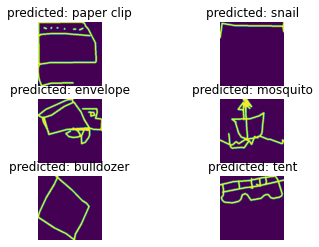

In [49]:
visualize_model(model_ft)

In [50]:
del dataloaders,legend
gc.collect()

14107

In [51]:
torch.cuda.empty_cache() 

In [52]:
gc.collect()

42

# preping testset and submission file

In [53]:
class testdf(torch.utils.data.Dataset):
    def __init__(self,df):
        self.DF=df

    def __len__(self):
        return self.DF.shape[0]
    
    def __getitem__(self,index):
        image=self.DF.image.iloc[index]
        image=np.array([image])
        return image

In [54]:
test=pd.read_csv("../input/quickdraw-doodle-recognition/test_simplified.csv").drawing
gc.collect()

42

In [55]:
test1=pd.DataFrame({"image":get_ims(test)})

In [56]:
del test
gc.collect()

21

In [57]:
gc.garbage

[]

In [58]:
test=testdf(test1)

In [59]:
testloader = DataLoader(test, batch_size=128*2, shuffle=False, num_workers=0)

In [60]:
del test
gc.collect()

84

# PREDICTION

In [61]:

model_ft.eval()
model_ft = model_ft.to(device)
labels = np.empty((0,3))
#labels = labels.to(device)
for x in tqdm.tqdm(testloader):
    x = x.to(device)
    output = model_ft(x/255)
    _, pred = output.topk(3, 1, True, True)
    labels = np.concatenate([labels, pred.cpu()], axis = 0)

100%|██████████| 439/439 [00:59<00:00,  7.43it/s]


In [62]:
submission = pd.read_csv('../input/quickdraw-doodle-recognition/test_simplified.csv', index_col='key_id')
submission.drop(['countrycode', 'drawing'], axis=1, inplace=True)
submission['word'] = ''
for i, label in enumerate(labels):
    submission.word.iloc[i] = " ".join([decode_labels(l) for l in label])

In [63]:
submission.to_csv("submission.csv")

In [64]:
submission

,word
key_id,
9000003627287624,radio stereo snorkel
9000010688666847,hockey puck belt pool
9000023642890129,The Great Wall of China castle squiggle
9000038588854897,mountain pliers saw
9000052667981386,campfire fireplace mouth
...,...
9999946504414373,blueberry strawberry apple
9999967586702768,skull cow mushroom
9999968529902445,rain bush garden
